<a href="https://colab.research.google.com/github/shydaparveen/-Generative-adversarial-network-GAN-/blob/main/25167032_GAN_CLASS_2_25_9_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/bapujik/dataSets/main/GAdata.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
df["GRE Score"]

,GRE Score
0,337
1,324
2,316
3,322
4,314
...,...
495,332
496,337
497,330
498,312


In [9]:
df.nunique()

,0
Serial No.,500
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [10]:
df["Research"].nunique()

2

In [11]:
df["University Rating"].nunique()

5

In [12]:
df["SOP"].nunique()

9

In [13]:
df["SOP"].value_counts()

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


/tmp/ipython-input-1346547198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GRE Score"])


<Axes: xlabel='GRE Score', ylabel='Density'>

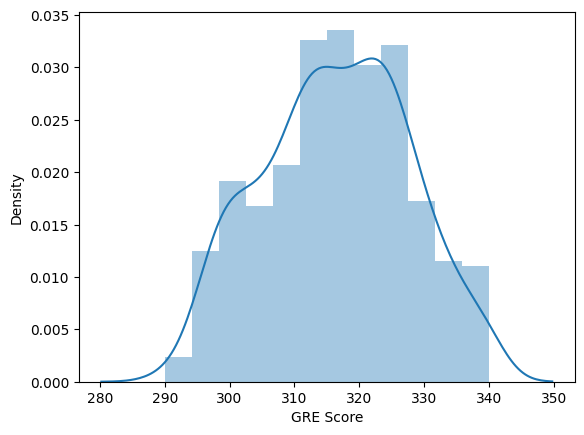

In [14]:
sns.distplot(df["GRE Score"])

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

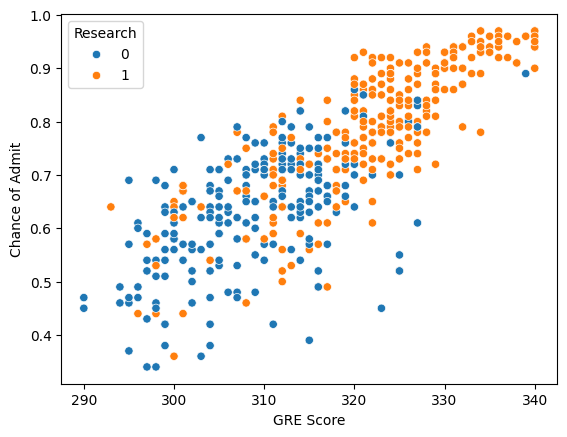

In [15]:
sns.scatterplot(x="GRE Score", y="Chance of Admit", data=df, hue = "Research" )

<Axes: xlabel='Research', ylabel='GRE Score'>

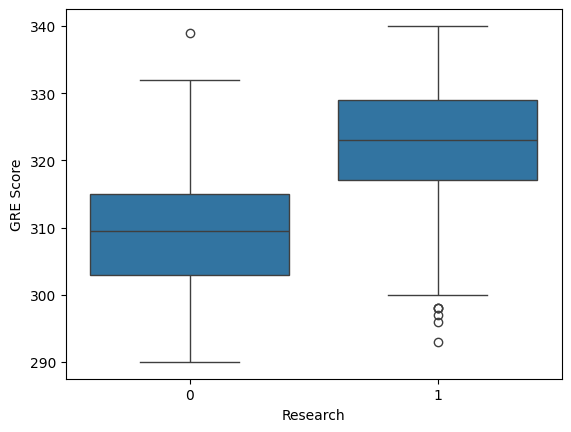

In [16]:
sns.boxplot(x="Research", y="GRE Score", data=df)

In [17]:
np.random.seed(5)
num_students = 100
exam1_score = np.random.normal(70,10,num_students)
exam2_score = np.random.normal(75,15,num_students)

In [18]:
exam1_score

array([74.41227487, 66.69129848, 94.30771187, 67.4790787 , 71.09609842,
       85.82481117, 60.90767595, 64.08363342, 71.87603226, 66.70130042,
       58.07235388, 67.95123489, 66.41171053, 76.03471603, 53.35211471,
       62.99820962, 81.51391009, 88.57331007, 54.88820442, 76.44847511,
       60.19392115, 61.43146845, 61.28120817, 65.77492071, 79.96439827,
       77.12421271, 70.59144243, 66.36689122, 70.03288843, 68.94069558,
       77.93053319, 63.6842837 , 69.93805092, 68.98932388, 69.47691849,
       72.49217659, 71.97660091, 83.34848574, 69.13124394, 85.61532293,
       66.94146979, 65.22268583, 71.00738189, 73.55438472, 72.69612406,
       82.91963383, 81.39342979, 74.94440398, 66.63663741, 68.99385654,
       84.13398018, 72.21254123, 56.89226867, 63.10434768, 64.22486767,
       81.5220477 , 68.92836015, 92.60106774, 76.5661947 , 71.24806825,
       65.64296081, 79.7217931 , 67.59288858, 61.75876547, 75.68132718,
       70.12758317, 81.89060726, 69.26406681, 41.40312033, 77.89

In [19]:
exam1_score.mean()

np.float64(70.91546643867777)

(array([ 1.,  1.,  4.,  8., 27., 22., 16., 12.,  6.,  3.]),
 array([41.40312033, 46.69357949, 51.98403864, 57.27449779, 62.56495695,
        67.8554161 , 73.14587526, 78.43633441, 83.72679356, 89.01725272,
        94.30771187]),
 <BarContainer object of 10 artists>)

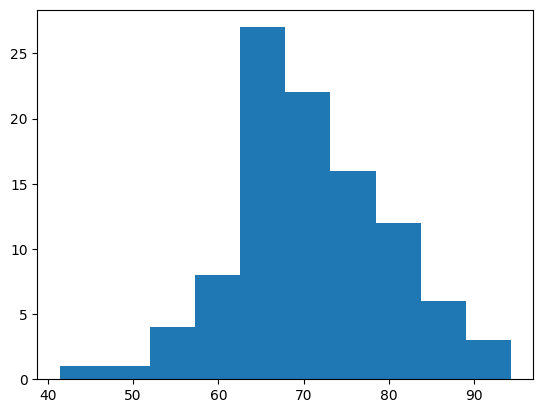

In [20]:
plt.hist(exam1_score)

/tmp/ipython-input-3926547136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exam1_score)


<Axes: ylabel='Density'>

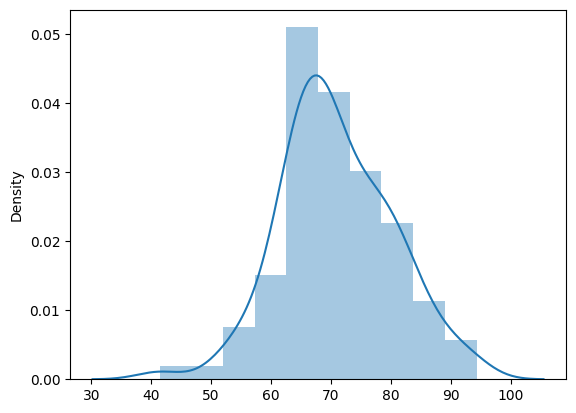

In [21]:
sns.distplot(exam1_score)

(array([ 3.,  6.,  9., 14., 19., 20., 15.,  8.,  2.,  4.]),
 array([ 39.19953383,  46.5607919 ,  53.92204997,  61.28330804,
         68.64456611,  76.00582417,  83.36708224,  90.72834031,
         98.08959838, 105.45085644, 112.81211451]),
 <BarContainer object of 10 artists>)

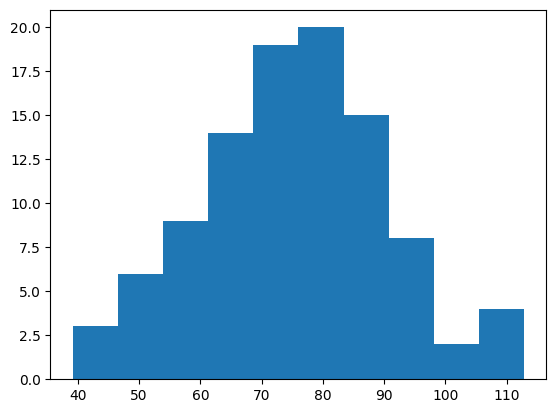

In [22]:
plt.hist(exam2_score)

/tmp/ipython-input-1781341742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exam2_score)


<Axes: ylabel='Density'>

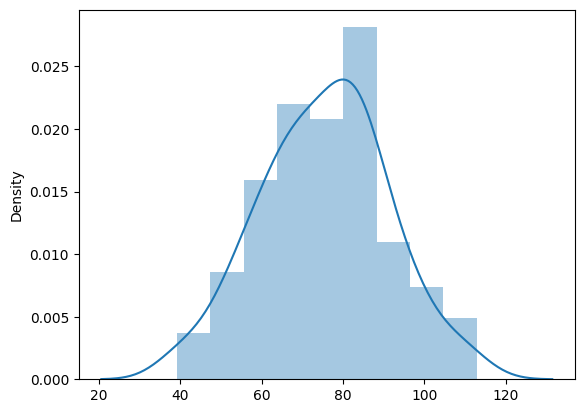

In [23]:
sns.distplot(exam2_score)

{'whiskers': [<matplotlib.lines.Line2D at 0x7cb72eaa56a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cb72eaa5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cb72eafe270>],
 'medians': [<matplotlib.lines.Line2D at 0x7cb72eaa61e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cb72eaa64b0>],
 'means': []}

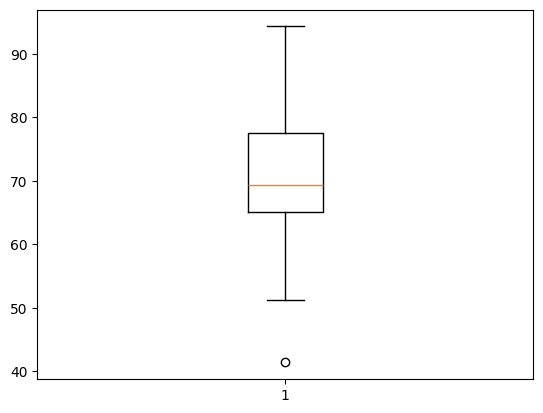

In [24]:
plt.boxplot(exam1_score)

{'whiskers': [<matplotlib.lines.Line2D at 0x7cb72e918350>,
 'caps': [<matplotlib.lines.Line2D at 0x7cb72e918920>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cb72e918230>],
 'medians': [<matplotlib.lines.Line2D at 0x7cb72e918e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cb72e919190>],
 'means': []}

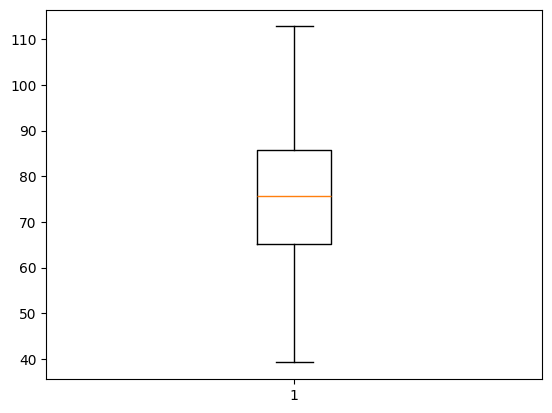

In [25]:
plt.boxplot(exam2_score)

In [26]:
exam2_score.min()

np.float64(39.19953383430934)

In [27]:
exam1_score.min()

np.float64(41.40312033377444)

In [28]:
exam1_score.max()

np.float64(94.3077118700778)

In [29]:
exam1_score[0] = 120
exam2_score[0] = 25

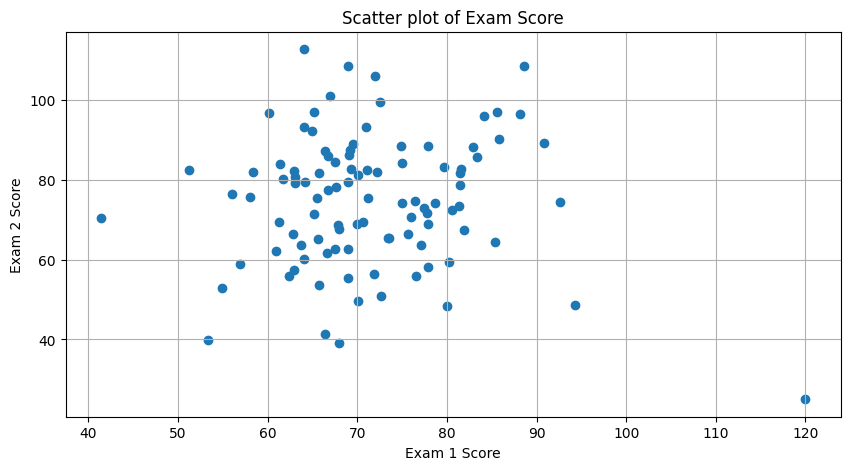

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(exam1_score, exam2_score)
plt.title("Scatter plot of Exam Score")

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")



plt.grid()
plt.show()

Text(0, 0.5, 'Frequency')

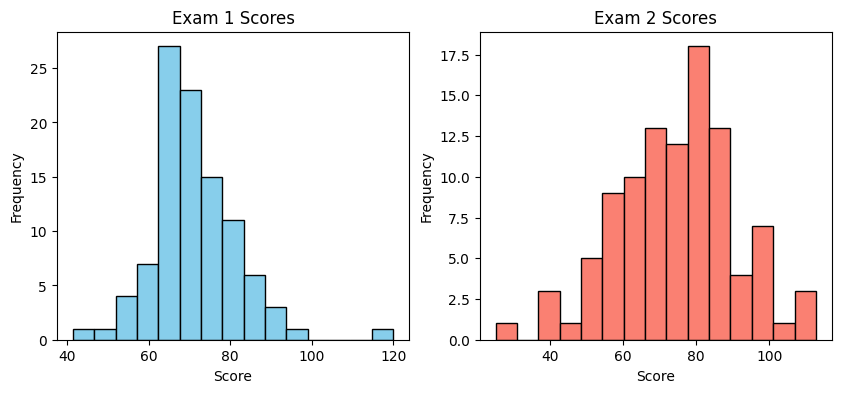

In [31]:
plt.figure(figsize=(10,4))

# Exam 1
plt.subplot(1,2,1)  # (rows, columns, position)
plt.hist(exam1_score, bins=15, edgecolor='black', color='skyblue')
plt.title("Exam 1 Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")

# Exam 2
plt.subplot(1,2,2)
plt.hist(exam2_score, bins=15, edgecolor='black', color='salmon')
plt.title("Exam 2 Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")

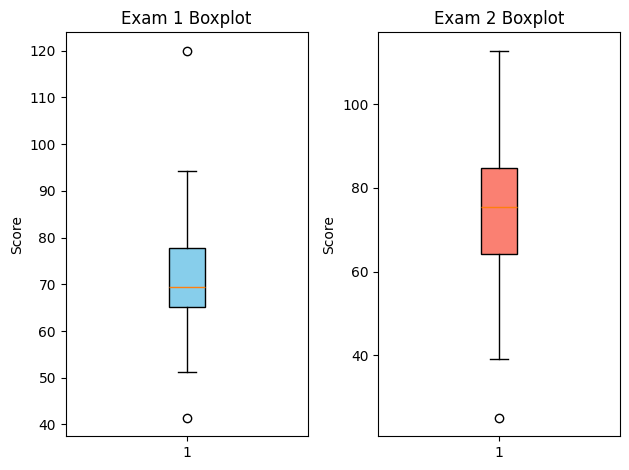

In [32]:
plt.subplot(1,2,1)
plt.boxplot(exam1_score, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Exam 1 Boxplot")
plt.ylabel("Score")

# Exam 2
plt.subplot(1,2,2)
plt.boxplot(exam2_score, patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.title("Exam 2 Boxplot")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

In [33]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


<Axes: >

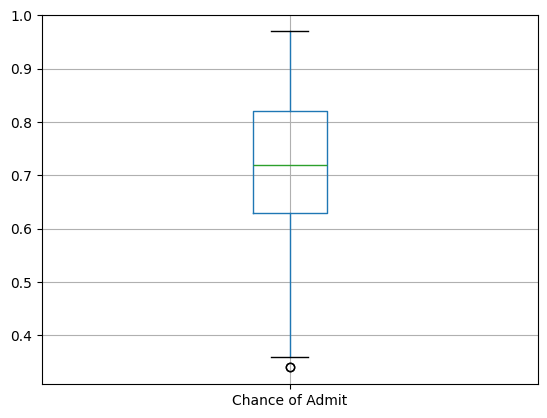

In [34]:
df.boxplot(column=["Chance of Admit"])

<Axes: >

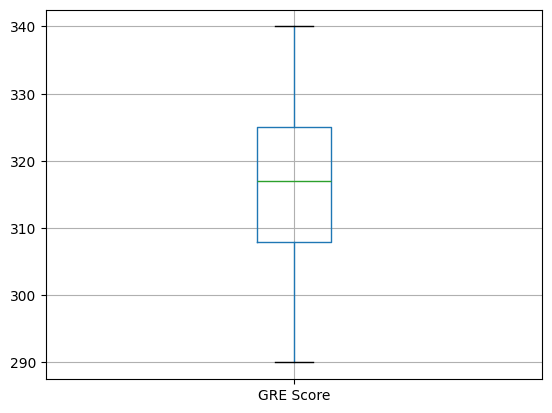

In [35]:
df.boxplot(column=["GRE Score"])

<Axes: >

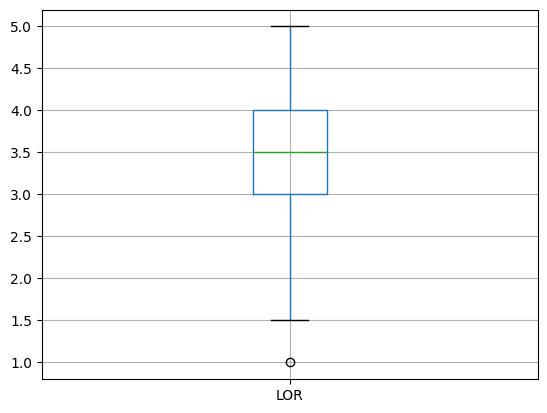

In [36]:
df.boxplot(column=["LOR"])

<Axes: >

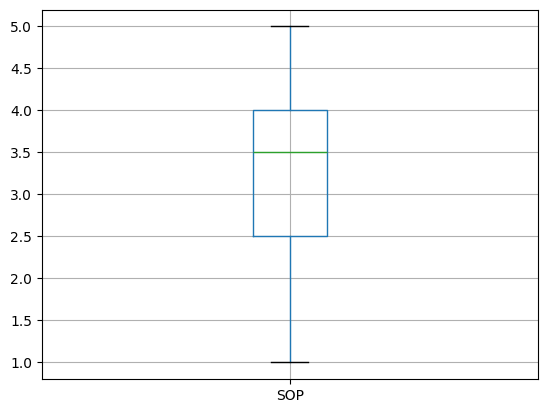

In [37]:
df.boxplot(column=["SOP"])

<Axes: >

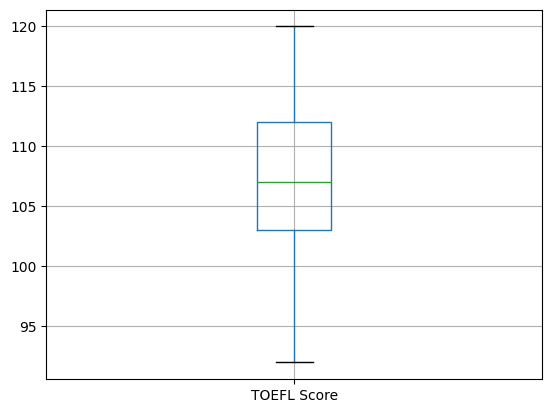

In [38]:
df.boxplot(column=["TOEFL Score"])

<Axes: >

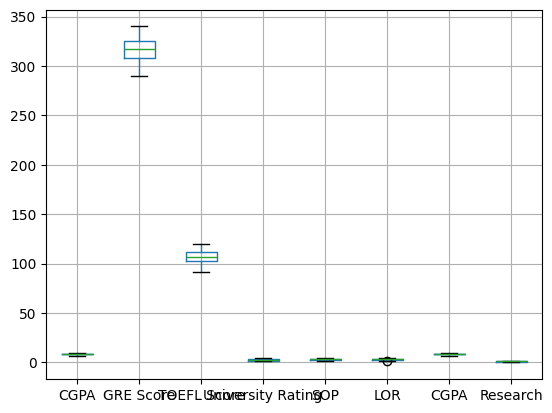

In [39]:
df.boxplot(column=["CGPA",'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research' ])

<Axes: >

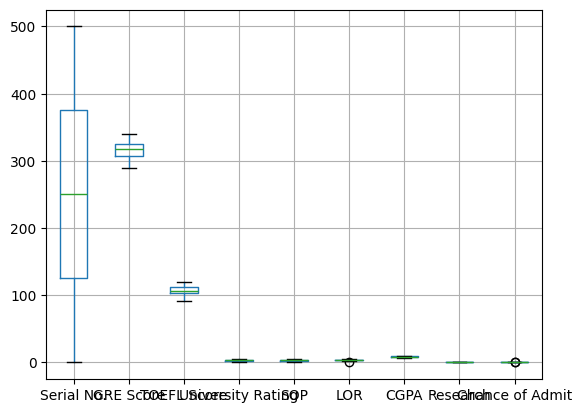

In [40]:
df.boxplot()

In [41]:
df1 = df.copy()

In [42]:
df1.drop(["Serial No."], axis = 1, inplace = True)

In [43]:
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


<Axes: >

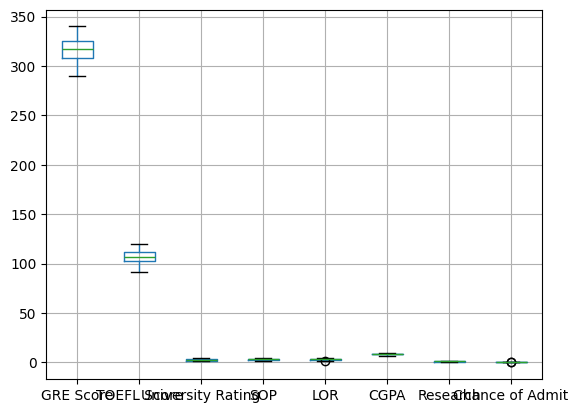

In [44]:
df1.boxplot()

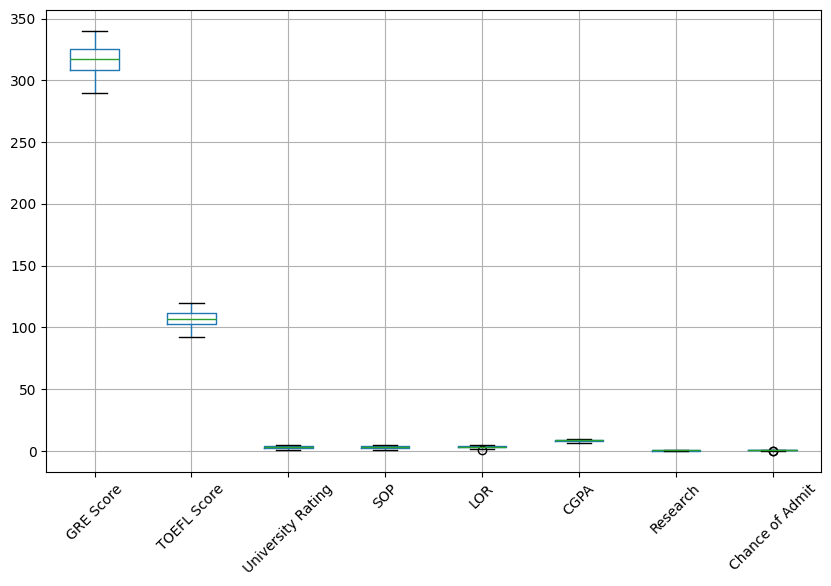

In [45]:
df1.boxplot(figsize=(10,6))
plt.xticks(rotation=45)   # Rotate x-axis labels 45 degrees
plt.show()

#IQR pf the box plot...

In [46]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [47]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [48]:
# Find outliers column-wise
for col in df1.select_dtypes(include=['number']).columns:
    out_col = df1[(df1[col] < lower_bound[col]) | (df1[col] > upper_bound[col])][col]
    if not out_col.empty:
        print(f"Outliers in {col}:\n{out_col.values}\n")

Outliers in LOR:
[1.]

Outliers in Chance of Admit:
[0.34 0.34]



In [49]:
df1_out  = df1[(df1["GRE Score"] > lower_bound["GRE Score"]) & (df1["GRE Score"] < upper_bound["GRE Score"])]

In [50]:
# Calculate Q1, Q3 and IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows where all numeric values are within the bounds
df_no_outliers = df1[~((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)]

print("Original shape:", df1.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Original shape: (500, 8)
Shape after removing outliers: (497, 8)


In [51]:
df_no_outliers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


#UNIVERIENT analysis

In [52]:
new_df = df_no_outliers

In [53]:
new_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


<Axes: ylabel='Frequency'>

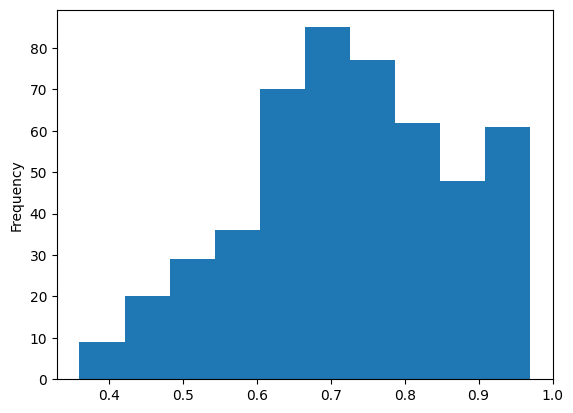

In [54]:
new_df["Chance of Admit"].plot.hist()

<Axes: ylabel='Frequency'>

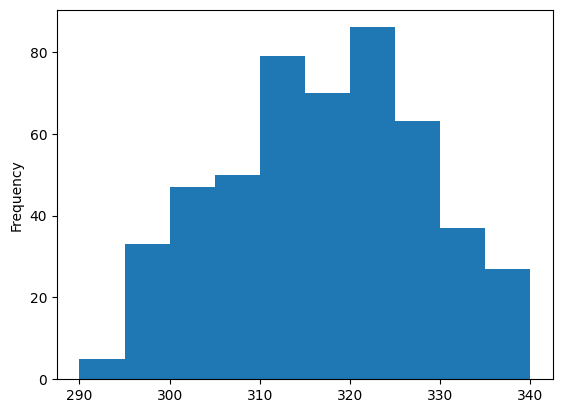

In [55]:
new_df["GRE Score"].plot.hist()

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

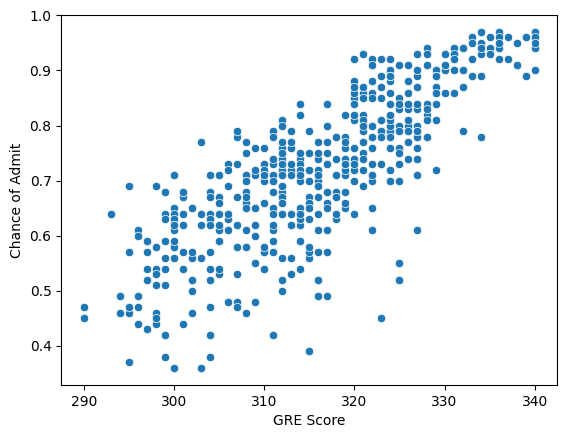

In [56]:
sns.scatterplot(x="GRE Score", y="Chance of Admit", data=new_df)

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

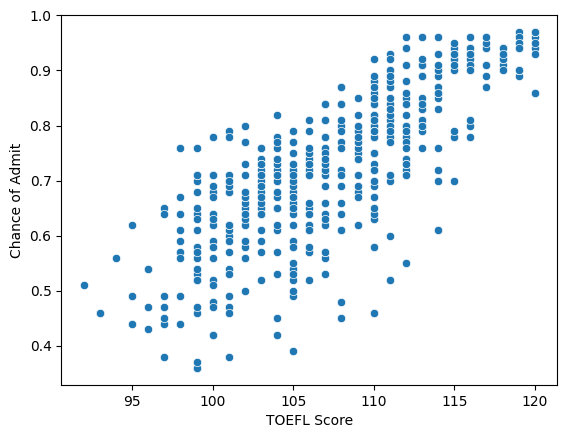

In [57]:
sns.scatterplot(x="TOEFL Score", y="Chance of Admit", data=new_df)

#correlarion

In [58]:
import numpy as np

x = [1,2,3,4,5]
y = [4,8,12,16,20]

mean_x = np.mean(x)
mean_y = np.mean(y)

num = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
den_x = sum((xi - mean_x) ** 2 for xi in x)
dem_y = sum((yi - mean_y) ** 2 for yi in y)

corr_coeff = num / (den_x * dem_y) ** 0.5

print(corr_coeff)

1.0


In [59]:
new_df["GRE Score"].corr(new_df["Chance of Admit"])

np.float64(0.80759358658696)

In [60]:
new_df["TOEFL Score"].corr(new_df["Chance of Admit"])

np.float64(0.7881282679383222)

In [61]:
new_df["SOP"].corr(new_df["Chance of Admit"])

np.float64(0.6906536756925242)

In [62]:
new_df["LOR"].corr(new_df["Chance of Admit"])

np.float64(0.6411144930960703)

In [63]:
new_df["Research"].corr(new_df["Chance of Admit"])

np.float64(0.5413457820701235)

In [64]:
c = new_df.corr()

In [65]:
c

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.824360,0.631514,0.614286,0.518457,0.823739,0.558932,0.807594
TOEFL Score,0.824360,1.000000,0.645349,0.643806,0.533263,0.807282,0.461071,0.788128
University Rating,0.631514,0.645349,1.000000,0.727569,0.603831,0.701979,0.422304,0.688621
SOP,0.614286,0.643806,0.727569,1.000000,0.659858,0.711175,0.406490,0.690654
LOR,0.518457,0.533263,0.603831,0.659858,1.000000,0.631188,0.366721,0.641114
CGPA,0.823739,0.807282,0.701979,0.711175,0.631188,1.000000,0.496515,0.883121
Research,0.558932,0.461071,0.422304,0.406490,0.366721,0.496515,1.000000,0.541346
Chance of Admit,0.807594,0.788128,0.688621,0.690654,0.641114,0.883121,0.541346,1.000000


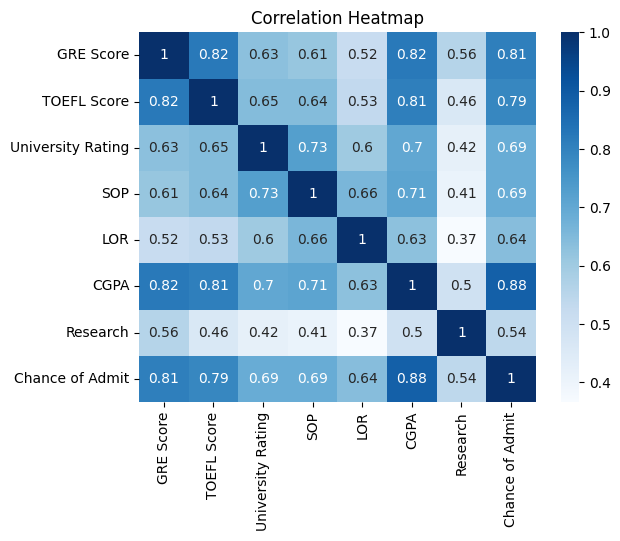

In [66]:
sns.heatmap(data=c, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [67]:
new_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

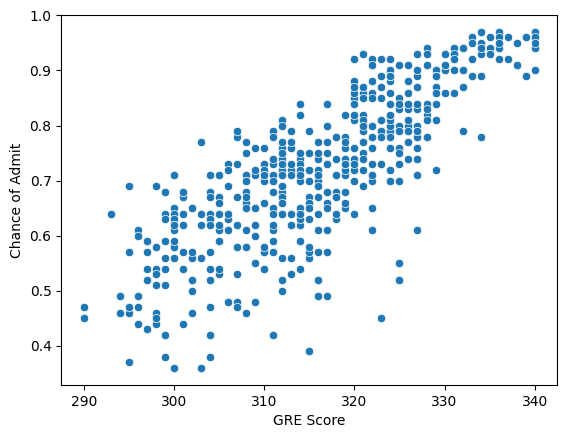

In [68]:
sns.scatterplot(x="GRE Score", y="Chance of Admit", data=new_df )

In [69]:
X = new_df.drop("Chance of Admit", axis=1)
y = new_df["Chance of Admit"]

In [71]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [72]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [73]:
X_gre = new_df["GRE Score"].values.reshape(-1,1)

In [74]:
y_gre = new_df["Chance of Admit"].values.reshape(-1,1)

In [75]:
X_gre.shape

(497, 1)

In [76]:
y_gre.shape

(497, 1)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mae

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_gre, y_gre, test_size=0.25, random_state=56)

In [79]:
X_train.shape

(372, 1)

In [80]:
X_test.shape

(125, 1)

In [81]:
slr = LR()

In [82]:
slr.fit(X_train, y_train)

LinearRegression()

In [83]:
slr.coef_

array([[0.01004595]])

In [84]:
slr.intercept_

array([-2.45467281])

In [85]:
m = slr.coef_[0]
m

array([0.01004595])

In [86]:
c = slr.intercept_[0]
c

np.float64(-2.454672806981426)

In [87]:
new_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [88]:
ca = m * 337 + c
ca

array([0.9308126])

In [89]:
list(zip(y, m* X_gre +c))

[(0.92, array([0.9308126])),
 (0.76, array([0.80021524])),
 (0.72, array([0.71984763])),
 (0.8, array([0.78012334])),
 (0.65, array([0.69975573])),
 (0.9, array([0.86049094])),
 (0.75, array([0.77007739])),
 (0.68, array([0.63948003])),
 (0.5, array([0.57920432])),
 (0.45, array([0.79016929])),
 (0.52, array([0.81026119])),
 (0.84, array([0.83035309])),
 (0.78, array([0.84039904])),
 (0.62, array([0.62943408])),
 (0.61, array([0.66961788])),
 (0.54, array([0.69975573])),
 (0.66, array([0.72989358])),
 (0.65, array([0.74998549])),
 (0.63, array([0.73993954])),
 (0.62, array([0.58925027])),
 (0.64, array([0.67966383])),
 (0.7, array([0.81026119])),
 (0.94, array([0.84039904])),
 (0.95, array([0.90067475])),
 (0.97, array([0.92076665])),
 (0.94, array([0.96095045])),
 (0.76, array([0.78012334])),
 (0.44, array([0.53902052])),
 (0.46, array([0.50888267])),
 (0.54, array([0.65957193])),
 (0.65, array([0.55911242])),
 (0.74, array([0.83035309])),
 (0.91, array([0.94085855])),
 (0.9, array([0

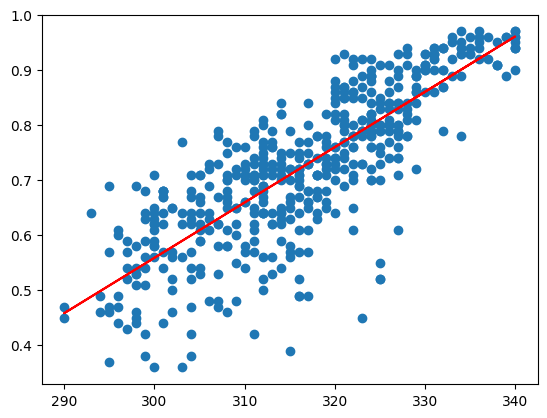

In [91]:
plt.scatter(X_gre, y)
plt.plot(X_gre, m* X_gre +c, color="red")
plt.show()